### Sales Analysis

#### Objective : Given a sales data of 2019 analyze and solve various business questions

## Business Questions to solve:
<br><b>Question 1: What was the best month for sales? How much was earned that month? </b></br>
<br><b>Question 2: What city sold the most product? </b></br>
<br><b>Question 3: What time should we display advertisements to maximize likelihood of customer's buying product? </b></br>
<br><b>Question 4: What products are most often sold together?</b></br>
<br><b>What product sold the most? Why do you think it sold the most?</b></br>
    


#### Import necessary libraries

In [2]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [3]:
### Consider each file inside the specified path 
### os.listdir gives list of all available at specified path
files = [file for file in os.listdir("C:/Users/shwer/OneDrive/Desktop/Sales/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/")] 

all_months_data = pd.DataFrame()
## Within that list consider each file add with the existing path location. Do it for every file inside the list and concat with all_months_data dataframe
for file in files:
    current_data = pd.read_csv("C:/Users/shwer/OneDrive/Desktop/Sales/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Notice: There are some null rows

### Clean up the data!


##### Drop rows of NAN

In [5]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']  # As seen Order Date column has some 'OrderDate' value so to remove them

#### Make columns correct type

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Convert to float 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Convert to float

### Augment data with additional columns

#### Add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2] # Consider first 2 values of Order date to get month value 
all_data['Month'] = all_data['Month'].astype('int32') # convert to integer type
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [9]:
def get_city(address):
    return address.split(",")[1] # getting the city whcih is at 1 location after splitting by ,

def get_state(address):
    return address.split(",")[2].split(" ")[1] # getting state which is located at 3 index location by splitting , and then at 1 index by split by space

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+')') # Joining city and State
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration 

#### Question 1: What was the best month for sales? How much was earned that month? 

In [10]:
## Get Sales= Quantity * Price
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [11]:
all_data.to_csv("all_data_copy.csv", index=False)

In [10]:
## Summing all sales value by month 
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


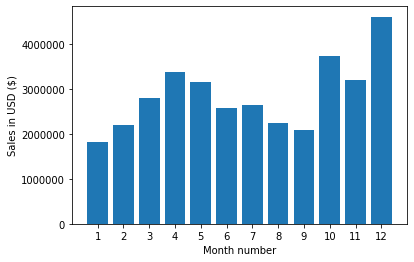

In [24]:
### Plotting Sales in each month
import matplotlib.pyplot as plt

months = range(1,13) # Required for plotting of months on x-axis
results=all_data.groupby('Month').sum()

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()




##### Observations:
December has most sales of over 46000000 $

#### Question 2: What city sold the most product?

In [12]:
# Group by City 
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']


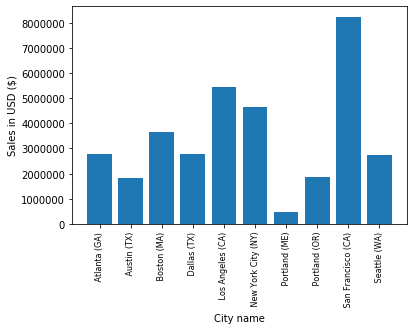

In [26]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby(['City'])] # to get proper order of cities with their respective i.e. getting cities in x axis in same order based on group by done using dictionary and then just getting key which is city name for plotting purpose 
print(cities)

plt.bar(cities,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()

###### Observations:
San Francisco has highest sales of approximate 8000000 $

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour # convert to datetime then to hours
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute # convert to datetime then to minute

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


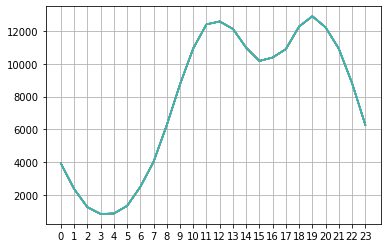

In [27]:
time = [pair for pair, df in all_data.groupby('Hour')] # Similarly to get time (hr) in same order as done by group by on hour using dictionary concept and getting only keys because keys contains hr 

plt.plot(time, all_data.groupby(['Hour']).count())
plt.xticks(time)
plt.grid()
plt.show()



##### Observations:
Recommendation is slightly before 12am or 7pm to maximize product Sales

#### Question 4: What products are most often sold together?

#### Reference: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

In [19]:
# to get rows where orderid is repeated
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31


##### Reference: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby/45925961

In [21]:
# to get a new column to have items bought with same orderid together
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

In [47]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',') # sublist
    count.update(Counter(combinations(row_list, 2))) # Count 2 productsas key along with their frequency as value

for key,value in count.most_common(10): # most_common returns top 10 most frequent 2 products bought
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Observations:
Iphone and Lightning cable is most common combination of 2 products bought by customers

#### What product sold the most? Why do you think it sold the most?

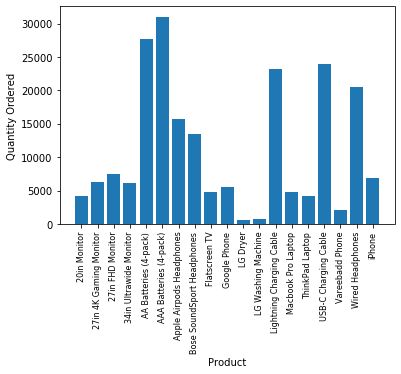

In [29]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products= [pair for pair, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

### Observations: 
##### AAA batteries and AA batteries are sold the most

##### Reference: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


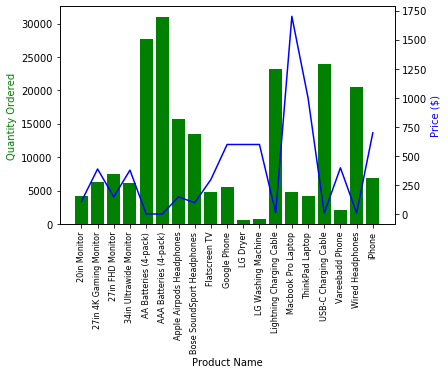

In [23]:
# Adding a new y axis of price to get to know why some products have high demand  

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### Observations:
###### So AAA batteries have high demand because of cheap price